In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("kddcup_corrected_subset.csv", index_col=None)

In [3]:
df.head()

,duration,"""protocol_type""","""flag""","""src_bytes""","""dst_bytes""","""land""","""wrong_fragment""","""urgent""",hot,"""num_failed_logins""",...,"""dst_host_srv_count""","""dst_host_same_srv_rate""","""dst_host_diff_srv_rate""","""dst_host_same_src_port_rate""","""dst_host_srv_diff_host_rate""",dst_host_serror_rate,"""dst_host_srv_serror_rate""","""dst_host_rerror_rate""","""dst_host_srv_rerror_rate""",label
0,0,tcp,SF,223,185,0,0,0,0,0,...,255,1,0,1,1,0,0,0,0,normal
1,0,tcp,SF,230,260,0,0,0,0,0,...,255,1,0,33,7,33,0,0,0,normal
2,0,tcp,SF,297,13787,0,0,0,0,0,...,255,1,0,1,1,0,0,0,0,normal
3,0,tcp,SF,291,3542,0,0,0,0,0,...,255,1,0,1,1,0,0,0,0,normal
4,0,tcp,SF,295,753,0,0,0,0,0,...,255,1,0,1,1,0,0,0,0,normal


In [4]:
df.shape

(41237, 41)

In [5]:
y = df["label"].values
from collections import Counter
Counter(y)

Counter({'normal': 39247,
         'apache2': 794,
         'phf': 2,
         'back': 1098,
         'neptune': 93,
         'portsweep': 2,
         'saint': 1})

In [7]:
from sklearn.preprocessing import LabelEncoder
encodings = dict()
for c in df.columns:
    if df[c].dtype == "object":
        encodings[c] = LabelEncoder()
        df[c] = encodings[c].fit_transform(df[c])

In [8]:
y = df.pop("label").values
X = df.values

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [10]:
from sklearn.ensemble import IsolationForest
contaminationParameter = 1-sum(y_train==encodings["label"].transform(["normal"])[0])/len(y_train)
IF = IsolationForest(n_estimators=100, max_samples=256,contamination=contaminationParameter)

In [11]:
IF.fit(X_train)

c:\users\etsukerman\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


IsolationForest(behaviour='old', bootstrap=False,
        contamination=0.048987510609918794, max_features=1.0,
        max_samples=256, n_estimators=100, n_jobs=None, random_state=None,
        verbose=0)

In [12]:
scores = IF.decision_function(X_val)

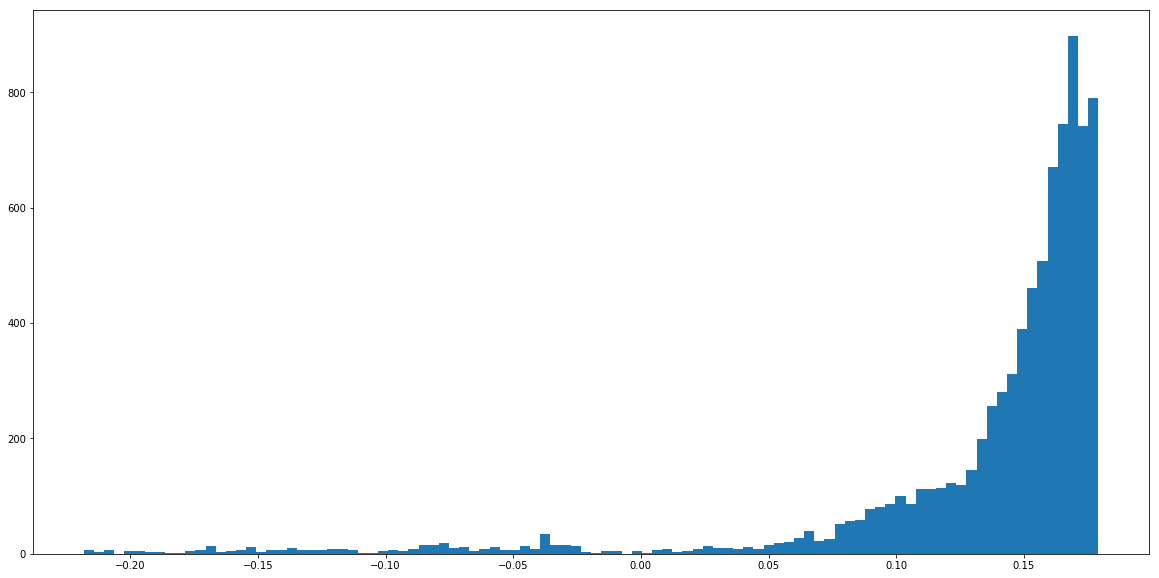

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20, 10))
_ = plt.hist(scores, bins=100)

In [14]:
cutoff = -0.07

In [15]:
print(Counter(y_val))
print(Counter(y_val[cutoff>scores]))

Counter({3: 7871, 1: 199, 0: 165, 2: 13})
Counter({0: 158, 1: 64, 2: 13, 3: 8})


In [16]:
scores_test = IF.decision_function(X_test)
print(Counter(y_test))
print(Counter(y_test[cutoff>scores_test]))

Counter({3: 7847, 1: 224, 0: 152, 2: 22, 6: 1, 5: 1, 4: 1})
Counter({0: 148, 1: 83, 2: 22, 3: 3, 6: 1, 5: 1})
